In [ ]:
#0. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio

     |████████████████████████████████| 108.1 MB 3.9 MB/s eta 0:00:01     |█████▎                          | 17.8 MB 5.6 MB/s eta 0:00:17     |█████▌                          | 18.6 MB 5.6 MB/s eta 0:00:17     |█████▋                          | 19.0 MB 5.6 MB/s eta 0:00:16     |████████▊                       | 29.4 MB 8.6 MB/s eta 0:00:10     |███████████████████████████     | 91.1 MB 16.3 MB/s eta 0:00:02     |████████████████████████████▉   | 97.3 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 9.2 MB/s eta 0:00:01


In [2]:
!pip install easyocr

     |████████████████████████████████| 48.9 MB 836 kB/s eta 0:00:01     |███████▋                        | 11.7 MB 6.5 MB/s eta 0:00:06     |███████████▎                    | 17.2 MB 9.7 MB/s eta 0:00:04     |██████████████████████████      | 39.8 MB 8.8 MB/s eta 0:00:02
     |████████████████████████████████| 12.2 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 10.8 MB/s eta 0:00:01


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#1. Read in images or video

In [10]:
IMAGE_PATH = 'surf.png'
#IMAGE_PATH = 'surf.jpeg'

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[49, 20], [454, 20], [454, 92], [49, 92]],
  'Tesseract Will',
  0.23154014348983765),
 ([[21, 83], [480, 83], [480, 175], [21, 175]],
  'Fail With Noisy',
  0.1624733954668045),
 ([[52, 158], [447, 158], [447, 244], [52, 244]],
  'Backgrounds',
  0.7128682732582092)]

In [ ]:
# 2. Draw Results

In [12]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

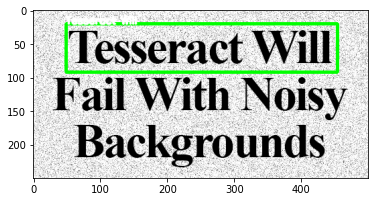

In [13]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [ ]:
# 3. Handling Multiple Lines

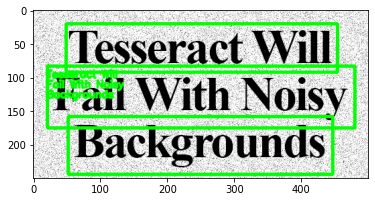

In [14]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()